In [1]:
import os
os.chdir(r'C:\MyLibs\Dubrovnik\dubScripts')
os.getcwd()


'c:\\MyLibs\\Dubrovnik\\dubScripts'

In [2]:
# datafile = r'C:\MyLibs\Dubrovnik\dubScripts\Tesla_batteries.txt'
# datafile = r'C:\MyLibs\Dubrovnik\dubScripts\Tesla_batteries_read_from_flash.hex'
datafile = r'Tesla.txt'
with open(datafile, 'r') as fh:
    data_array = fh.read()
# print(data_array)

In [3]:
# bindata = data_array.encode()
bindata = bytes(data_array, 'utf-8')
print(type(bindata)) 

<class 'bytes'>


In [4]:
# text = bytearray(b'abcdefgh')
binfilename = r'Tesla.bin'
with open(binfilename, 'wb') as fh:
    fh.write(bindata)

In [3]:
datafile = r'C:\MyLibs\Dubrovnik\dubScripts\a_bin_file.bin'

with open(datafile, 'rb') as fh:
    df = fh.read()
print(df)

b'Unplugged Performance\'s "Dark Helmet," driven by Randy Pobst, clocked 1:28.213!\nUnplugged Performance announced that its race-modified Tesla Model S Plaid, which won the Exhibition class of the 2021 Pikes Peak International Hill Climb race (see video), just set another EV track record at the Laguna Seca race track.\n\nRandy Pobst managed to achieve a time of 1:28.213, during the TeslaCorsa 16 event on August 1, 2021.\n\nThat\'s noticeably better than the previous unofficial best of 1:29.9 (Tesla\'s internal testing), reported on May, 1:30.3 time from September 2020 and 1:36.55 in September 2019 (prototype).\n\nAccording to the FastestLaps\' list of fastest official lap times (not yet updated as of the time of publishing), the Tesla Model S Plaid is one of the fastest production cars at the track:\n\nMcLaren Senna (P15) (Randy Pobst) - 1:27.62\nTesla Model S Plaid race-modified (Randy Pobst) - 1:28.213\nPorsche 911 GT2 RS (991) (Randy Pobst) - 1:28.30\nTesla Model S Plaid (Tesla tes

In [ ]:
block_size = 4
start_addr = 0xfff + 0x1001
blockSizeKB = block_size * 1024
# startAddr = start_addr & blockSizeKB
startAddr = (start_addr // blockSizeKB) * blockSizeKB
print(hex(startAddr))

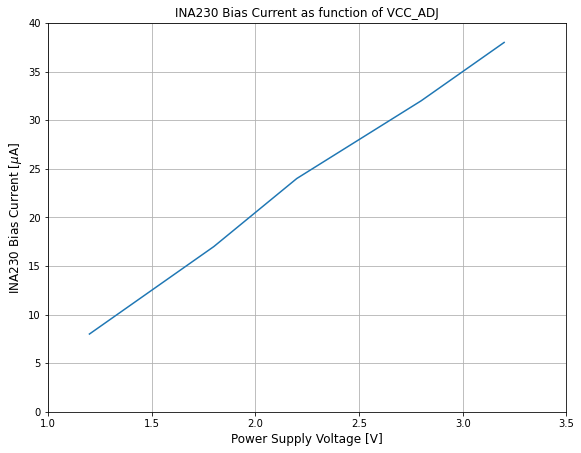

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib auto

x = np.array([1.2, 1.8, 2.2, 2.8, 3.2])
y = np.array([8, 17, 24, 32, 38])

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,.9,.9])
ax1.set_xlabel('Power Supply Voltage [V]', fontsize=12)
ax1.set_ylabel('INA230 Bias Current [$\mu$A]', fontsize=12)
ax1.set_title('INA230 Bias Current as function of VCC_ADJ')
ax1.set_xlim([1,3.5])
ax1.set_ylim([0,40])
ax1.plot(x,y)
ax1.grid(True)

In [18]:
vmax = 81.9175
vmin = -81.92
vtot = vmax - vmin
print(vtot)
vlsb = vtot / 2**16
print(vlsb)
tmin = -40
troom = 25
tmax = 125
ppm = 50e-6

error_min = vlsb * ppm*tmin
error_typ = vlsb * ppm*troom
error_max = vlsb * ppm*tmax
print(f'delta_i (-40C) = {error_min:.1e}')
print(f'delta_i (25C)  = {error_typ:.1e}')
print(f'delta_i (125C) = {error_max:.1e}')

163.8375
0.002499961853027344
delta_i (-40C) = -1.0e-06
delta_i (25C)  = 6.2e-07
delta_i (125C) = 3.1e-06


In [7]:
wt = '60123123 us = at25sf'


['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [14]:
wt = 'Part#               = AT25SF641'
wt.split('=')[1].strip()

'AT25SF641'

In [15]:
confstr = ['Part#               = AT25SF641', 'Voltage             = 2.995', 'Frequency           = 60.00', 'Mode                = SPI', 'Dummy Cycle Count   = 4', 'Host Drive Strength = 6', 'PMON configuration:', 'avg                = 1', 'vst (us)           = 8244', 'vbt (us)           = 1100', 'mode               = sbc', 'meas               = i', 'min meas time (us) = 9344']

In [29]:
d_config = {}
type(confstr)
for item in confstr:
    print(item)
    conf = item.split('=')
    # print(conf)
    key = conf[0].strip()
    if 'PMON conf' in key:
        continue # skip "PMON configuration" subtitle
    val = conf[1].strip()
    print(f'key: {key}, value: {val}')
    d_config[key] = val
print(d_config)



Part#               = AT25SF641
key: Part#, value: AT25SF641
Voltage             = 2.995
key: Voltage, value: 2.995
Frequency           = 60.00
key: Frequency, value: 60.00
Mode                = SPI
key: Mode, value: SPI
Dummy Cycle Count   = 4
key: Dummy Cycle Count, value: 4
Host Drive Strength = 6
key: Host Drive Strength, value: 6
PMON configuration:
caught PMON conf
avg                = 1
key: avg, value: 1
vst (us)           = 8244
key: vst (us), value: 8244
vbt (us)           = 1100
key: vbt (us), value: 1100
mode               = sbc
key: mode, value: sbc
meas               = i
key: meas, value: i
min meas time (us) = 9344
key: min meas time (us), value: 9344
{'Part#': 'AT25SF641', 'Voltage': '2.995', 'Frequency': '60.00', 'Mode': 'SPI', 'Dummy Cycle Count': '4', 'Host Drive Strength': '6', 'avg': '1', 'vst (us)': '8244', 'vbt (us)': '1100', 'mode': 'sbc', 'meas': 'i', 'min meas time (us)': '9344'}


In [1]:
# params = {'start_address': [0x0000, 0x4000, 0x8000, 0xc000, 0x10000],
#                          'length': [0x4000,0x4000,0x4000,0x4000,0x4000],
#                          'pattern': ['aaaaaaaa','00000000','ffffffff','f0f0f0f0','ff00ff00']}

# for key in params.values():
#     print(key)
#     for value in key:
#         print(value)



In [7]:
params = [[0x0000, 0x4000, 'aaaaaaaa'],
          [0x4000, 0x4000, '00000000'],
          [0x8000, 0x4000, 'ffffffff'],
          [0xc000, 0x4000, 'f0f0f0f0'],
          [0x10000, 0x4000, 'ff00ff00']]

for param in params:
    print(param)
    p1 = param[0]
    p2 = param[1]
    p3 = param[2]
    print(p1,p2,p3)
    # for value in key:
    #     print(value)


[0, 16384, 'aaaaaaaa']
<class 'int'> 16384 <class 'str'>
[16384, 16384, '00000000']
<class 'int'> 16384 <class 'str'>
[32768, 16384, 'ffffffff']
<class 'int'> 16384 <class 'str'>
[49152, 16384, 'f0f0f0f0']
<class 'int'> 16384 <class 'str'>
[65536, 16384, 'ff00ff00']
<class 'int'> 16384 <class 'str'>


In [15]:
def time_unit_conversion(elapsed_time):
    t_wait = float(elapsed_time.split(' ')[0])
    if t_wait < 1e3:
        wait_time = f'{t_wait} us'
    elif t_wait >= 1e3 and t_wait < 1e6:
        wait_time = f'{t_wait/1e3:.3f} ms'
    else:
        wait_time = f'{t_wait/1e6:.3f} sec'
    return wait_time

In [17]:
time_unit_conversion('12345678 us')

'12.346 sec'

In [2]:
import tkinter as tk

class ExampleApp(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.label = tk.Label(self, text="", width=10)
        self.label.pack()
        self.remaining = 0
        self.countdown(10)

    def countdown(self, remaining = None):
        if remaining is not None:
            self.remaining = remaining

        if self.remaining <= 0:
            self.label.configure(text="time's up!")
        else:
            self.label.configure(text="%d" % self.remaining)
            self.remaining = self.remaining - 1
            self.after(1000, self.countdown)

if __name__ == "__main__":
    app = ExampleApp()
    app.mainloop()

In [11]:
from tkinter import *
import time

root = Tk()

def clock():
    # https://www.tutorialspoint.com/python/time_strftime.htm
    # hour = time.strftime("%H")
    hour = time.strftime("%I")
    minute = time.strftime("%M")
    second = time.strftime("%S")
    day = time.strftime("%A")
    am_pm = time.strftime("%p")
    time_zone = time.strftime("%Z")
    # time_zone = time.strftime("%z")

    my_label2.config(text=f'{day} {time_zone}')

    my_label.config(text=f'{hour}:{minute}:{second} {am_pm}')
    my_label.after(1000, clock)

# def update():
#     my_label.config(text="New Text")

my_label = Label(root, text="", font=('Helvetica', 48), fg='green', bg='black')
my_label.pack(pady=20)

my_label2 = Label(root, text="", font=('Helvetica', 14))
my_label2.pack(pady=10)

clock()

root.mainloop()
    